# Libraries

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.cross_validation
import sklearn.tree
import sklearn.metrics

# Read data

In [14]:
work_dir='/home/ggomarr/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/' + \
         'Course data/Part 3 - Classification/Section 19 - Decision Tree Classification/'
df=pd.read_csv(work_dir+'Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df=df.drop(['User ID','Gender'],axis=1)
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [16]:
X=df[['Age','EstimatedSalary']].values
Y=df['Purchased'].values
X[:5],Y[:5]

(array([[   19, 19000],
        [   35, 20000],
        [   26, 43000],
        [   27, 57000],
        [   19, 76000]]), array([0, 0, 0, 0, 0]))

# Clean up missing data

In [17]:
sum(X!=X),sum(np.isnan(Y))

(array([0, 0]), 0)

In [18]:
# imputer=sklearn.preprocessing.Imputer(missing_values='NaN',strategy='mean',axis=0).fit(X[:,1:3])
# X[:,1:3]=imputer.transform(X[:,1:3])
# X

# Create dummy variables

In [19]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(X[:,0])
# X[:,0]=label_encoder.transform(X[:,0])
# one_hot_encoder=sklearn.preprocessing.OneHotEncoder(categorical_features=[0]).fit(X)
# X=one_hot_encoder.transform(X).toarray()
# X

# Avoid the dummy variable trap

In [20]:
# X=X=np.delete(X,0,1)
# X

# Create categorical labels

In [21]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(Y)
# Y=label_encoder.transform(Y)
# Y

# Feature scaling

In [22]:
X_scaler=sklearn.preprocessing.StandardScaler().fit(X)
X_scaled=X_scaler.transform(X)
X_scaled[:5]
# X_scaler,Y_scaler=sklearn.preprocessing.StandardScaler().fit(X),sklearn.preprocessing.StandardScaler().fit(Y)
# X_scaled,Y_scaled=X_scaler.transform(X),Y_scaler.transform(Y)
# X_scaled,Y_scaled

/home/ggomarr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

# Train/test split

In [23]:
X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X_scaled,Y,
                                                                        test_size=0.25,random_state=0)
Y_train.size,Y_test.size

(300, 100)

In [24]:
# X_train,Y_train

In [25]:
# X_test,Y_test

# Decision Tree Classifier

In [26]:
model_classes={ 'Decision Tree':{ 'model':sklearn.tree.DecisionTreeClassifier,
                                  'params':{'criterion':'entropy',
                                            'random_state':0} },
              }

In [27]:
def range_plot_X(X,num=100,ext=0.1):
    max_X,min_X=max(X),min(X)
    delta=max_X-min_X
    max_X,min_X=max_X+ext*delta,min_X-ext*delta
    delta=(max_X-min_X)/(num-1)
    return np.array(np.arange(min_X,max_X+delta,delta)[:num].reshape((num,1)))

In [28]:
X_plot,Y_plot=np.meshgrid(range_plot_X(X_scaled[:,0],num=1000),range_plot_X(X_scaled[:,1],num=1000))
cmap_lst=('red','green')

=== Decision Tree ===

Score:
Train 1.00 - Test 0.91

Confusion matrix:
[[62  6]
 [ 3 29]]

Classification report:
             precision    recall  f1-score   support

          0       0.95      0.91      0.93        68
          1       0.83      0.91      0.87        32

avg / total       0.91      0.91      0.91       100


Train


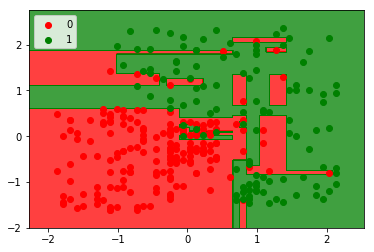


Test


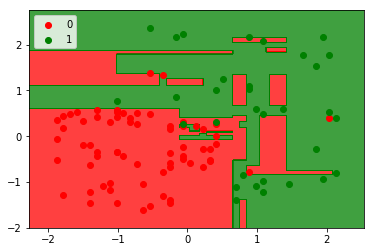

In [29]:
for class_name in model_classes:
    print('=== {} ==='.format(class_name))
    model_class=model_classes[class_name]['model']
    params=model_classes[class_name]['params']
    model=model_class(**params).fit(X_train,Y_train)
    print('\nScore:')
    print('Train {:0.2f} - Test {:0.2f}'.format(model.score(X_train,Y_train),model.score(X_test,Y_test)))
    print('\nConfusion matrix:')
    print(sklearn.metrics.confusion_matrix(Y_test,model.predict(X_test)))
    print('\nClassification report:')
    print(sklearn.metrics.classification_report(Y_test,model.predict(X_test)))
    print('\nTrain')
    cont=model.predict(np.array([X_plot.ravel(),Y_plot.ravel()]).T).reshape(X_plot.shape)
    plt.contourf(X_plot,Y_plot,cont,alpha=0.75,cmap=matplotlib.colors.ListedColormap(cmap_lst))
    plt.scatter(X_train[Y_train==0,0],X_train[Y_train==0,1],c=cmap_lst[0],label=0)
    plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1],c=cmap_lst[1],label=1)
    plt.legend()
    plt.show()
    print('\nTest')
    plt.contourf(X_plot,Y_plot,cont,alpha=0.75,cmap=matplotlib.colors.ListedColormap(cmap_lst))
    plt.scatter(X_test[Y_test==0,0],X_test[Y_test==0,1],c=cmap_lst[0],label=0)
    plt.scatter(X_test[Y_test==1,0],X_test[Y_test==1,1],c=cmap_lst[1],label=1)
    plt.legend()
    plt.show()